## Final Project Submission
Please fill out:

Student name: Olivia Lo

Student pace: part time 041519

Scheduled project review date/time: 06/27/2019, 4.30pm EST

Instructor name: Victor Geislinger

Blog post URL: TBC

# 1. Import library and review basic information of data

In [1]:
# import the relevant libraries to be used
import pandas as pd
import numpy as np
import seaborn as sns
from seaborn import lmplot
import scipy.stats as stats
import statsmodels as sm
import matplotlib.pyplot as plt
from matplotlib.pyplot import show,figure,subplot
from matplotlib import dates as dates

In [2]:
# import the dataframe
df = pd.read_csv('kc_house_data.csv','r', delimiter=',')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
# to import column name descriptions included within project
from IPython.display import display, Markdown
with open('column_names.md', 'r') as fh:
    content = fh.read()

display(Markdown(content))

# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


In [4]:
# to see how many rows of data there are
print(len(df))

21597


In [5]:
# to view the date range of the data
print(f"{df.date.max()} - {df.date.min()}")

9/9/2014 - 1/10/2015


In [6]:
# return the rows with a duplicated id and order by id
df[df.duplicated(['id'], keep=False)].sort_values(by='id').head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2495,1000102,4/22/2015,300000,6,3.00,2400,9373,2.0,0.0,0.0,...,7,2400,0,1991,0.0,98002,47.3262,-122.214,2060,7316
2494,1000102,9/16/2014,280000,6,3.00,2400,9373,2.0,NaN,0.0,...,7,2400,0,1991,0.0,98002,47.3262,-122.214,2060,7316
16800,7200179,10/16/2014,150000,2,1.00,840,12750,1.0,0.0,0.0,...,6,840,0,1925,0.0,98055,47.4840,-122.211,1480,6969
16801,7200179,4/24/2015,175000,2,1.00,840,12750,1.0,0.0,0.0,...,6,840,0,1925,NaN,98055,47.4840,-122.211,1480,6969
11422,109200390,10/20/2014,250000,3,1.75,1480,3900,1.0,0.0,0.0,...,7,1480,0,1980,0.0,98023,47.2977,-122.367,1830,6956


In [7]:
# to drop all the duplicates
df = df.drop_duplicates(subset='id', keep='first') 

In [8]:
# to see how many rows of data there are after removing duplicates
print(len(df))

21420


## Findings
The dataset contains 21,597 rows of data within the date range of 9/9/2014 - 1/20/2015. However, there are some rows that are duplicates. Remove these duplicated rows and we will analyze the remaining 21,420 rows of data.  

The dependent variable is price. We will use a regression model to find out which variable influence the housing price the most.

In [9]:
# to understand the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 21 columns):
id               21420 non-null int64
date             21420 non-null object
price            21420 non-null int64
bedrooms         21420 non-null int64
bathrooms        21420 non-null float64
sqft_living      21420 non-null int64
sqft_lot         21420 non-null int64
floors           21420 non-null float64
waterfront       19067 non-null float64
view             21357 non-null float64
condition        21420 non-null int64
grade            21420 non-null int64
sqft_above       21420 non-null int64
sqft_basement    21420 non-null object
yr_built         21420 non-null int64
yr_renovated     17616 non-null float64
zipcode          21420 non-null int64
lat              21420 non-null float64
long             21420 non-null float64
sqft_living15    21420 non-null int64
sqft_lot15       21420 non-null int64
dtypes: float64(7), int64(12), object(2)
memory usage: 3.6+ MB


In [10]:
# to understand the statistics of each variable
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.142000e+04,2.142000e+04,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000,19067.000000,21357.000000,21420.000000,21420.000000,21420.000000,21420.000000,17616.000000,21420.00000,21420.000000,21420.000000,21420.000000,21420.000000
mean,4.580940e+09,5.407393e+05,3.373950,2.118429,2083.132633,1.512804e+04,1.495985,0.007657,0.234677,3.410784,7.662792,1791.170215,1971.092997,83.847241,98077.87437,47.560197,-122.213784,1988.384080,12775.718161
std,2.876761e+09,3.679311e+05,0.925405,0.768720,918.808412,4.153080e+04,0.540081,0.087172,0.766459,0.650035,1.171971,828.692965,29.387141,400.436625,53.47748,0.138589,0.140791,685.537057,27345.621867
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.00000,47.155900,-122.519000,399.000000,651.000000
25%,2.123537e+09,3.225000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,1952.000000,0.000000,98033.00000,47.471200,-122.328000,1490.000000,5100.000000
50%,3.904921e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.00000,47.572100,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2220.000000,1997.000000,0.000000,98117.00000,47.678100,-122.125000,2370.000000,10086.250000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.00000,47.777600,-121.315000,6210.000000,871200.000000


In [11]:
# to determine which column has null values
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2353
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3804
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [12]:
# to determine other placeholders in the columns
for column in df:
    print(column)
    print('---------------')
    print('unique values:')
    print(df[column].unique())
    print('value counts:')
    print(df[column].value_counts(dropna = False).head())
    print('\n')

id
---------------
unique values:
[7129300520 6414100192 5631500400 ... 1523300141  291310100 1523300157]
value counts:
2911700010    1
5450300010    1
5104511600    1
1160000115    1
686530110     1
Name: id, dtype: int64


date
---------------
unique values:
['10/13/2014' '12/9/2014' '2/25/2015' '2/18/2015' '5/12/2014' '6/27/2014'
 '1/15/2015' '4/15/2015' '3/12/2015' '4/3/2015' '5/27/2014' '5/28/2014'
 '10/7/2014' '1/24/2015' '7/31/2014' '5/29/2014' '12/5/2014' '4/24/2015'
 '5/14/2014' '8/26/2014' '7/3/2014' '5/16/2014' '11/20/2014' '11/3/2014'
 '6/26/2014' '12/1/2014' '6/24/2014' '3/2/2015' '11/10/2014' '12/3/2014'
 '6/13/2014' '12/30/2014' '2/13/2015' '6/20/2014' '7/15/2014' '8/11/2014'
 '7/7/2014' '10/28/2014' '7/29/2014' '7/18/2014' '3/25/2015' '7/16/2014'
 '4/28/2015' '3/11/2015' '9/16/2014' '2/17/2015' '12/31/2014' '2/5/2015'
 '3/3/2015' '8/19/2014' '4/7/2015' '8/27/2014' '2/23/2015' '12/10/2014'
 '8/28/2014' '10/21/2014' '12/7/2014' '6/3/2014' '9/9/2014' '10/9/2014'
 '8/25/201

# Findings

Waterfront contains 18921 '0' values and 2353 'NaN' values;

View contains 63 'NaN' values;

sqft_basement contains 452 '?' values;

yr_renovated contains 16876 '0' values and 3804 'NaN' values.

# 2. Clean and explore the data

# View

{'whiskers': [<matplotlib.lines.Line2D at 0x1d231842b38>,
 'caps': [<matplotlib.lines.Line2D at 0x1d231842f60>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d231842710>,
 'medians': [<matplotlib.lines.Line2D at 0x1d23185a898>,
 'fliers': [],
 'means': []}

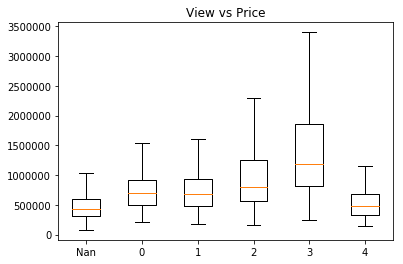

In [13]:
# from the summary above, we can see view has 6 unique values including NaN
# use a box plot to see what NaN means in View
vw_prices = []
vw_prices.append(df[df['view'] == 0.0].price)
vw_prices.append(df[df['view'] == 1.0].price)
vw_prices.append(df[df['view'] == 2.0].price)
vw_prices.append(df[df['view'] == 3.0].price)
vw_prices.append(df[df['view'] == 4.0].price)
vw_prices.append(df[df['view'].isna()].price)

plt.title('View vs Price')
plt.boxplot(vw_prices, labels=['Nan', '0', '1', '2', '3', '4'], showfliers=False)

In [14]:
# NaN and 0 are similar from box plot above
# replace NaN values with 0 in view category
df['view'].fillna(0,inplace=True)
df['view'].isnull().sum()

0

In [15]:
df['view'].value_counts()

0.0    19316
2.0      956
3.0      505
1.0      329
4.0      314
Name: view, dtype: int64

# Yr_renovated

{'whiskers': [<matplotlib.lines.Line2D at 0x1d231eb25c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d231eb2c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d231eb21d0>,
 'medians': [<matplotlib.lines.Line2D at 0x1d231ebb320>,
 'fliers': [],
 'means': []}

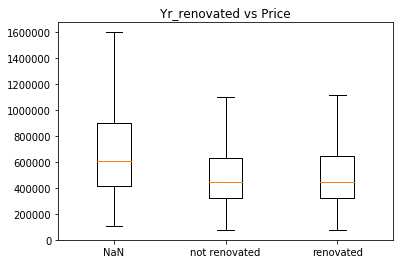

In [16]:
# from previous analysis we noted that Yr_renovated has 16876 '0' values and 3804 'NaN' values
# assume NaN and 0 both mean the house has never been renovated
# use a box plot to see what NaN means in Yr_renovated
rn_prices = []
rn_prices.append(df[(df['yr_renovated'] != 0.0) & (df['yr_renovated'].notna())].price)
rn_prices.append(df[df['yr_renovated'] == 0.0].price)
rn_prices.append(df[df['yr_renovated'].isna()].price)

plt.title('Yr_renovated vs Price')
plt.boxplot(rn_prices, labels=['NaN', 'not renovated', 'renovated'], showfliers=False)

In [18]:
# NaN and 0 are similar from box plot above
# replace NaN values with 0 in yr_renovated category
df['yr_renovated'].fillna(0,inplace=True)
df['yr_renovated'].isnull().sum()

0

In [19]:
df['yr_renovated'].value_counts().head()

0.0       20680
2014.0       73
2003.0       31
2013.0       31
2007.0       30
Name: yr_renovated, dtype: int64

# Waterfront

In [20]:
# waterfront contains 18921 '0' values and 2353 'NaN' values, assume this means no waterfront
# the other unique value for watarfront is "1", assume this means with waterfront
df.waterfront.value_counts(dropna=False)

0.0    18921
NaN     2353
1.0      146
Name: waterfront, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x1d231fb34e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d231fb3b70>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d231fb30b8>,
 'medians': [<matplotlib.lines.Line2D at 0x1d231fb3e10>,
 'fliers': [],
 'means': []}

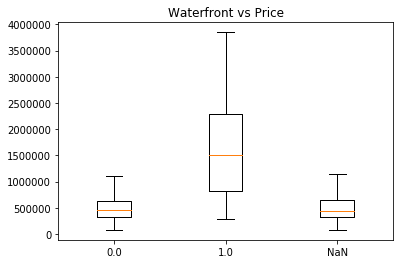

In [21]:
# plot a box plot to show the categories of waterfront
wf_prices = []
wf_prices.append(df[df['waterfront'] == 0.0].price)
wf_prices.append(df[df['waterfront'] == 1.0].price)
wf_prices.append(df[df['waterfront'].isna()].price)

plt.title('Waterfront vs Price')
plt.boxplot(wf_prices, labels=['0.0', '1.0', 'NaN'], showfliers=False)

In [22]:
# houses with waterfront has higher price
# replace the NaN values with 0 in waterfront
df['waterfront'].fillna(0, inplace=True)

In [23]:
df['waterfront'].value_counts().head()

0.0    21274
1.0      146
Name: waterfront, dtype: int64

# Sqft_basement

In [24]:
# this column contains 452 '?' values
# remove question marks in sqft_basement 
df = df[df.sqft_basement != '?']

In [25]:
df['sqft_basement'].value_counts().head()

0      12717
600      216
500      206
700      205
800      201
Name: sqft_basement, dtype: int64

In [26]:
# convert the datatype from object to integer
df['sqft_basement'] = df['sqft_basement'].astype(int)

# Date

In [27]:
# convert the datatype from object to datetime
df['date'] = df['date'].astype('datetime64')

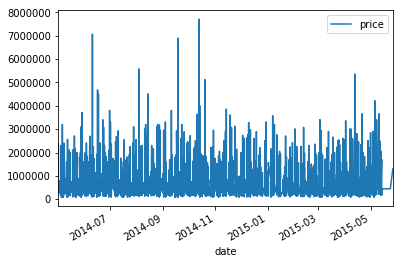

In [28]:
# try to see if there is a correlation between date and price
df.plot(x='date', y='price')

# Outliers

In [29]:
# from the stats description above, we see that bedrooms has an outlier (33)
# remove this outlier as it seems to be a mistake
df[df.bedrooms == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,2014-06-25,640000,33,1.75,1620,6000,1.0,0.0,0.0,...,7,1040,580,1947,0.0,98103,47.6878,-122.331,1330,4700


In [30]:
df = df[df.bedrooms != 33]

# Multicollinearity

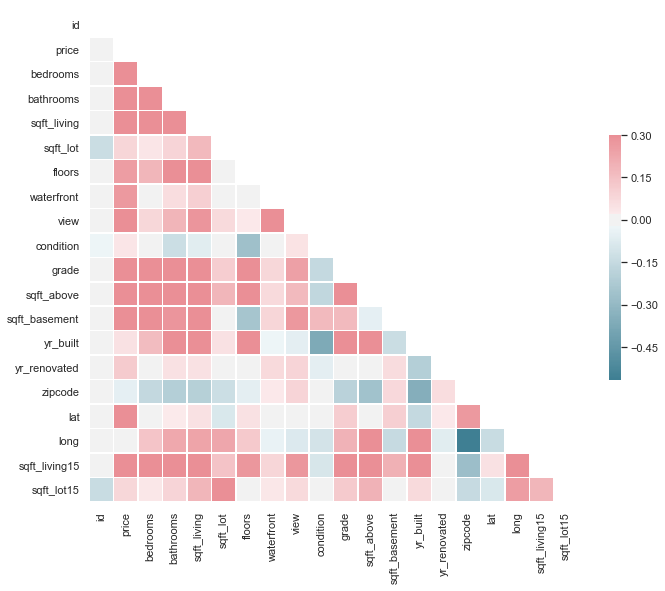

In [31]:
# Set the style of the visualization
sns.set(style="white")

# Create a covariance matrix
corr = df.corr()

# Generate a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [32]:
print(corr)

                     id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000 -0.017565  0.003087   0.005083    -0.013074 -0.133029   
price         -0.017565  1.000000  0.317257   0.526064     0.702204  0.087130   
bedrooms       0.003087  0.317257  1.000000   0.528847     0.594500  0.033438   
bathrooms      0.005083  0.526064  0.528847   1.000000     0.755058  0.087237   
sqft_living   -0.013074  0.702204  0.594500   0.755058     1.000000  0.172031   
sqft_lot      -0.133029  0.087130  0.033438   0.087237     0.172031  1.000000   
floors         0.018704  0.255801  0.184980   0.503319     0.353643 -0.008305   
waterfront    -0.002947  0.266565  0.000117   0.064611     0.106135  0.021182   
view           0.012355  0.394478  0.082703   0.185630     0.282029  0.072725   
condition     -0.023586  0.033914  0.021845  -0.130953    -0.063549 -0.009986   
grade          0.006925  0.667761  0.368221   0.665997     0.762703  0.112294   
sqft_above    -0.011736  0.6

# Findings

From the table above, we see sqft_living has high correlation with bathrooms, sqft_above, sqft_living15 and grade. 

Sqft_above has high correlation with sqft_living and grade.

Because of these correlation, we will need to drop certain variables.

# Drop the columns

In [33]:
# to drop id and date as they are less relevant to the price
# to drop view as it is unclear what this feature indicates and vast majority has a value of 0
# to drop sqft_living as it is highly correlated with a few columns
# to drop yr_renovated as the previous box plot shows price is indifferent
df.drop(['id','date','view','sqft_living','yr_renovated'], axis=1, inplace=True)

# Categorical data

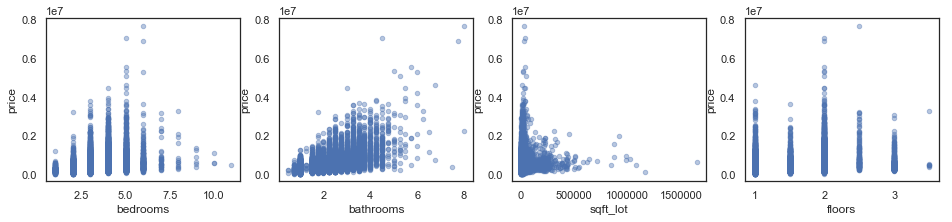

In [34]:
# to form scatter plot and decide which variable needs to be binned
# to form scatter plots of each independent variable
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(list(df)[1:5], axes):
    df.plot(kind='scatter', x= xcol, y="price", ax=ax, alpha=0.4, color='b') 

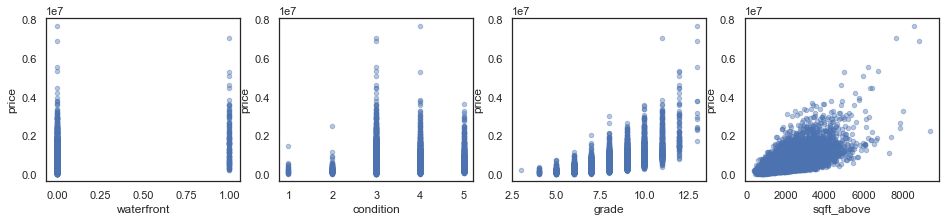

In [35]:
# to form scatter plot and decide which variable needs to be binned
# to form scatter plots of each independent variable
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(list(df)[5:9], axes):
    df.plot(kind='scatter', x= xcol, y="price", ax=ax, alpha=0.4, color='b') 

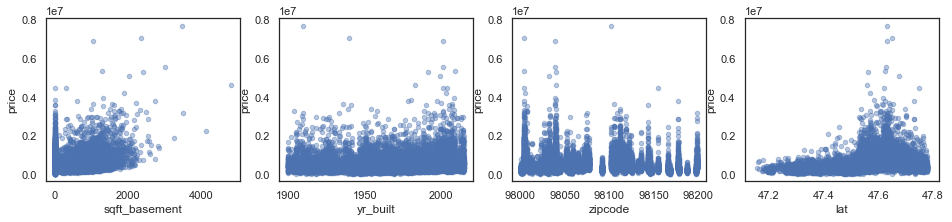

In [36]:
# to form scatter plot and decide which variable needs to be binned
# to form scatter plots of each independent variable
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(list(df)[9:13], axes):
    df.plot(kind='scatter', x= xcol, y="price", ax=ax, alpha=0.4, color='b') 

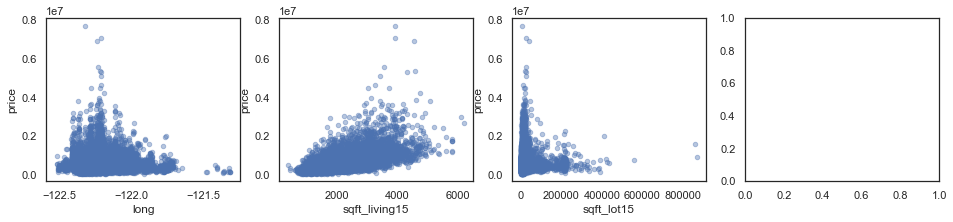

In [37]:
# to form scatter plot and decide which variable needs to be binned
# to form scatter plots of each independent variable
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(list(df)[13:16], axes):
    df.plot(kind='scatter', x= xcol, y="price", ax=ax, alpha=0.4, color='b') 

In [38]:
# based on the scatter plot and the verticality therein
# potentially need to bin floors, waterfront, condition, and zip code

# first, create bins for based on the values observed. 7 values will result in 6 bins
bins = [0, 1.5, 2 , 2.5, 3, 3.5]
bins_floors = pd.cut(df['floors'], bins)
bins_floors = bins_floors.cat.as_unordered()

# first, create bins for based on the values observed. 6 values will result in 5 bins
bins = [-0.25, 0.25, 0.5, 0.75, 1, 1.25]
bins_floors = pd.cut(df['waterfront'], bins)
bins_floors = bins_floors.cat.as_unordered()

# first, create bins for based on the values observed. 7 values will result in 6 bins
bins = [-1, 0.5, 1.5 , 2.5, 3.5, 4.5, 5.5]
bins_condition = pd.cut(df['condition'], bins)
bins_condition = bins_condition.cat.as_unordered()

# first, create bins for based on the values observed. 7 values will result in 6 bins
bins = [97999, 98025, 98080 , 98140, 98160, 98180, 98205]
bins_zipcode = pd.cut(df['zipcode'], bins)
bins_zipcode = bins_zipcode.cat.as_unordered()

In [39]:
# create dummy variables
floors_dummy = pd.get_dummies(bins_floors, prefix="floors")
waterfront_dummy = pd.get_dummies(bins_floors, prefix="waterfront")
condition_dummy = pd.get_dummies(bins_condition, prefix="condition")
zipcode_dummy = pd.get_dummies(bins_zipcode, prefix="zipcode")

df = df.drop(["floors","condition","zipcode"], axis=1)
df = pd.concat([df, floors_dummy, condition_dummy, zipcode_dummy], axis=1)

# Normalizing data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D23277A9B0>,
      dtype=object)

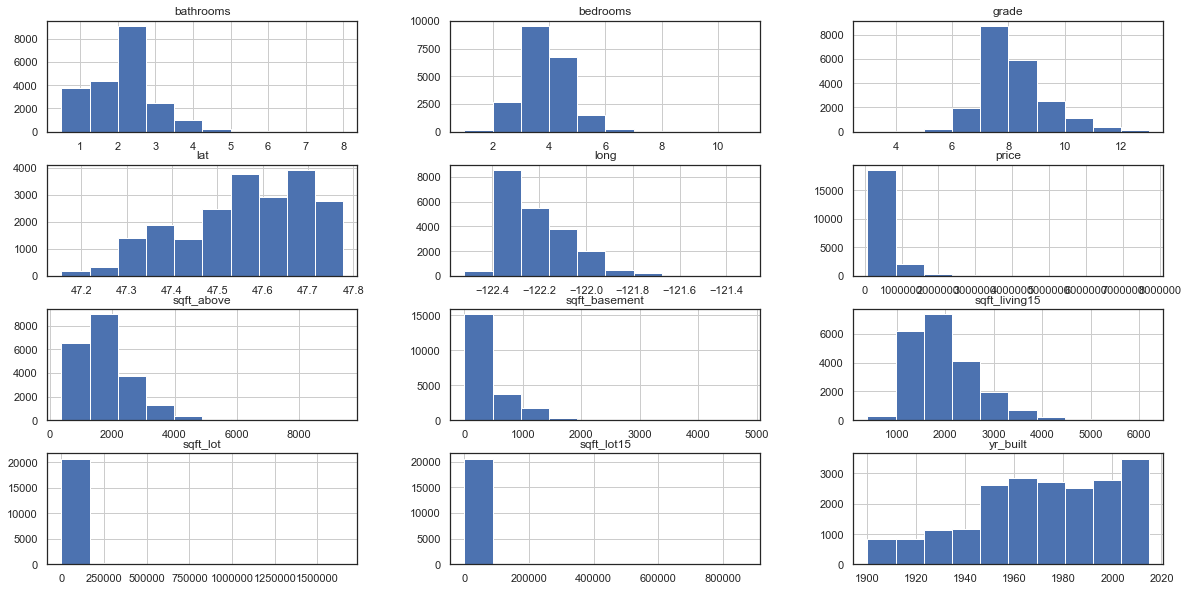

In [40]:
# plot histograms to decide which variables to transform
df[['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'lat', 'long', 'sqft_living15', 'sqft_lot15']].hist(figsize=(20, 10))

In [41]:
# majority of these columns shows skewness
# apply log transformation to all except for grade and yr_built
data_log_names = ["bathrooms", "bedrooms", "lat", "long", "price", "sqft_above", "sqft_basement", "sqft_living15", "sqft_lot", "sqft_lot15"]
data_log = df[data_log_names]

data_log["bathrooms"] = np.log(data_log["bathrooms"])
data_log["bedrooms"] = np.log(data_log["bedrooms"])
data_log["lat"] = np.log(data_log["lat"])
data_log["long"] = np.log(data_log["long"])
data_log["price"] = np.log(data_log["price"])
data_log["sqft_above"] = np.log(data_log["sqft_above"])
data_log["sqft_basement"] = np.log(data_log["sqft_basement"])
data_log["sqft_living15"] = np.log(data_log["sqft_living15"])
data_log["sqft_lot"] = np.log(data_log["sqft_lot"])
data_log["sqft_lot15"] = np.log(data_log["sqft_lot15"])

C:\Users\Olivia\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Olivia\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Olivia\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/inde

# 3. Modeling

# Take one - without log transformation

In [42]:
df.head()

,price,bedrooms,bathrooms,sqft_lot,waterfront,grade,sqft_above,sqft_basement,yr_built,lat,...,"condition_(1.5, 2.5]","condition_(2.5, 3.5]","condition_(3.5, 4.5]","condition_(4.5, 5.5]","zipcode_(97999, 98025]","zipcode_(98025, 98080]","zipcode_(98080, 98140]","zipcode_(98140, 98160]","zipcode_(98160, 98180]","zipcode_(98180, 98205]"
0,221900,3,1.00,5650,0.0,7,1180,0,1955,47.5112,...,0,1,0,0,0,0,0,0,1,0
1,538000,3,2.25,7242,0.0,7,2170,400,1951,47.7210,...,0,1,0,0,0,0,1,0,0,0
2,180000,2,1.00,10000,0.0,6,770,0,1933,47.7379,...,0,1,0,0,0,1,0,0,0,0
3,604000,4,3.00,5000,0.0,7,1050,910,1965,47.5208,...,0,0,0,1,0,0,1,0,0,0
4,510000,3,2.00,8080,0.0,8,1680,0,1987,47.6168,...,0,1,0,0,0,1,0,0,0,0


In [43]:
X = df.drop(["price"], axis=1)
y = df["price"]
import statsmodels.api as sm
X_int = sm.add_constant(X)
model = sm.OLS(y.astype(float),X_int.astype(float)).fit()
model.summary()

C:\Users\Olivia\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     2269.
Date:                Tue, 25 Jun 2019   Prob (F-statistic):               0.00
Time:                        21:39:57   Log-Likelihood:            -2.8606e+05
No. Observations:               20967   AIC:                         5.722e+05
Df Residuals:                   20945   BIC:                         5.723e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   -1.72e+07   9.63e+05    -17.855      0.000   -1.91e+07   -1.53e+07
bedrooms               -4.156e+04   2040.435    -20.366      0.000   -4.56e+04   -3.76e+04
bathrooms               4.521e+04   3238.606     13.960      0.000    3.89e+04    5.16e+04
sqft_lot                   0.1375      0.049      2.778      0.005       0.040       0.234
waterfront             -5.464e+06   3.21e+05    -17.000      0.000   -6.09e+06   -4.83e+06
grade                    9.77e+04   2223.579     43.939      0.000    9.33e+04    1.02e+05
sqft_above               186.1499      3.742     49.743      0.000     178.815     193.485
sqft_basement            165.7546      4.272     38.803      0.000     157.382     174.127
yr_built               -2599.4395     71.540    -36.336      0.000   -2739.663   -2459.216
lat                     5.559e+05   1.13e+04     49.300      0.000    5.34e+05    5.78e+05
long                   -1.088e+05    1.5e+04     -7.248      0.000   -1.38e+05   -7.94e+04
sqft_living15             41.9726      3.517     11.933      0.000      35.078      48.867
sqft_lot15                -0.4194      0.076     -5.535      0.000      -0.568      -0.271
floors_(-0.25, 0.25]   -1.174e+07   6.42e+05    -18.281      0.000    -1.3e+07   -1.05e+07
floors_(0.25, 0.5]      4.241e-08   2.38e-09     17.796      0.000    3.77e-08    4.71e-08
floors_(0.5, 0.75]     -2.365e-08   1.32e-09    -17.849      0.000   -2.62e-08   -2.11e-08
floors_(0.75, 1.0]     -5.464e+06   3.21e+05    -17.000      0.000   -6.09e+06   -4.83e+06
floors_(1.0, 1.25]      2.687e-09   1.53e-10     17.613      0.000    2.39e-09    2.99e-09
condition_(-1.0, 0.5]  -6.822e-12   1.25e-12     -5.470      0.000   -9.27e-12   -4.38e-12
condition_(0.5, 1.5]   -3.467e+06   1.96e+05    -17.729      0.000   -3.85e+06   -3.08e+06
condition_(1.5, 2.5]   -3.448e+06   1.93e+05    -17.850      0.000   -3.83e+06   -3.07e+06
condition_(2.5, 3.5]    -3.46e+06   1.93e+05    -17.943      0.000   -3.84e+06   -3.08e+06
condition_(3.5, 4.5]    -3.43e+06   1.93e+05    -17.785      0.000   -3.81e+06   -3.05e+06
condition_(4.5, 5.5]   -3.395e+06   1.93e+05    -17.616      0.000   -3.77e+06   -3.02e+06
zipcode_(97999, 98025]  -2.82e+06   1.59e+05    -17.711      0.000   -3.13e+06   -2.51e+06
zipcode_(98025, 98080] -2.875e+06   1.59e+05    -18.111      0.000   -3.19e+06   -2.56e+06
zipcode_(98080, 98140] -2.828e+06   1.61e+05    -17.522      0.000   -3.14e+06   -2.51e+06
zipcode_(98140, 98160] -2.903e+06   1.62e+05    -17.973      0.000   -3.22e+06   -2.59e+06
zipcode_(98160, 98180] -2.927e+06   1.61e+05    -18.146      0.000   -3.24e+06   -2.61e+06
zipcode_(98180, 98205] -2.846e+06   1.62e+05    -17.620      0.000   -3.16e+06   -2.53e+06
==============================================================================
O

C:\Users\Olivia\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


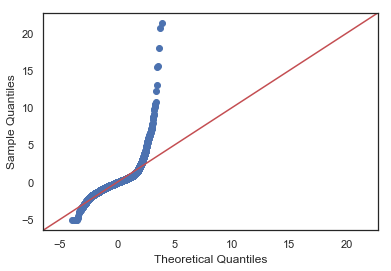

In [44]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

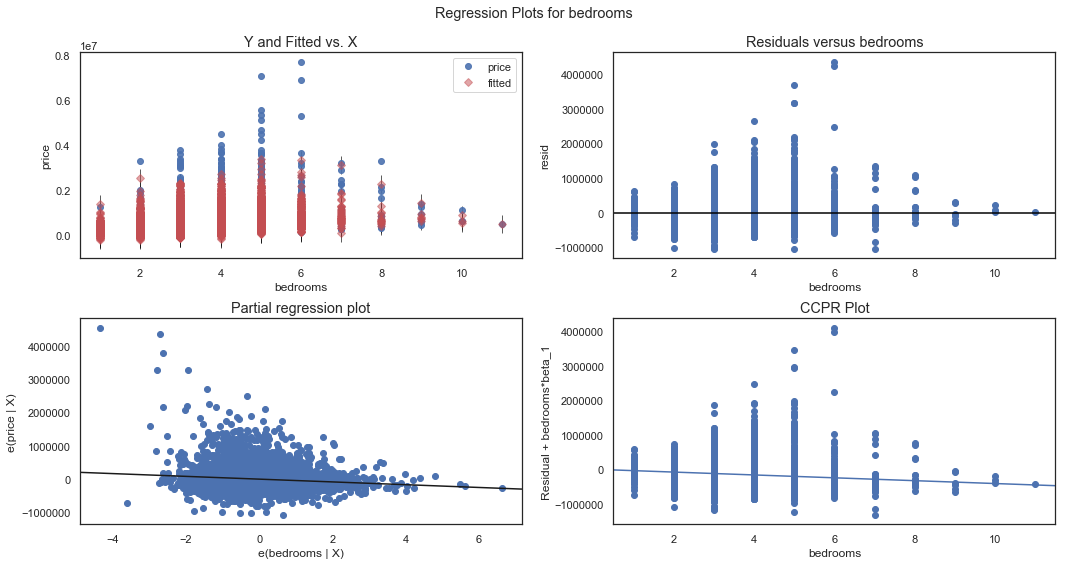

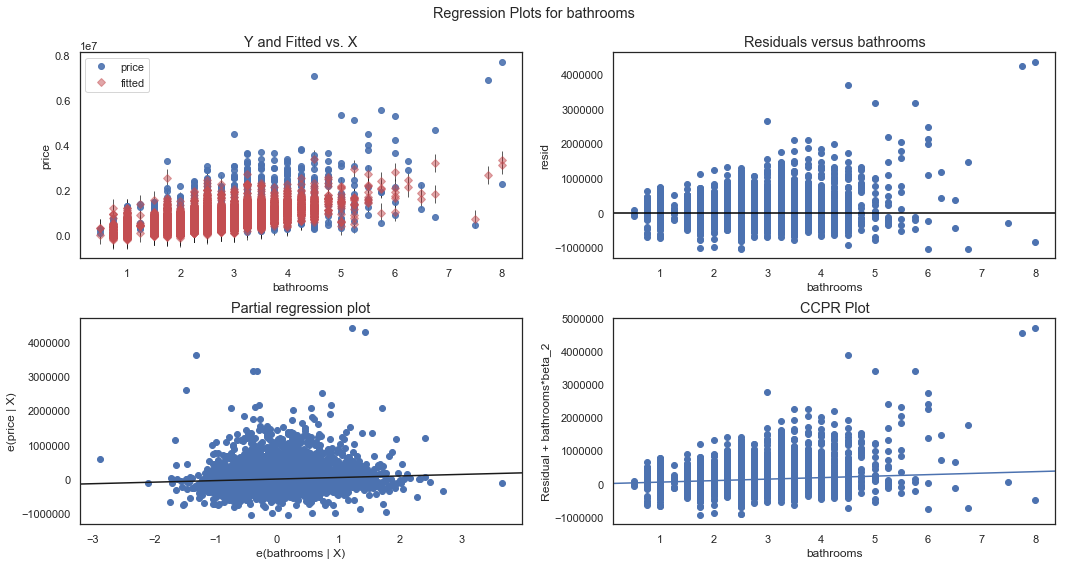

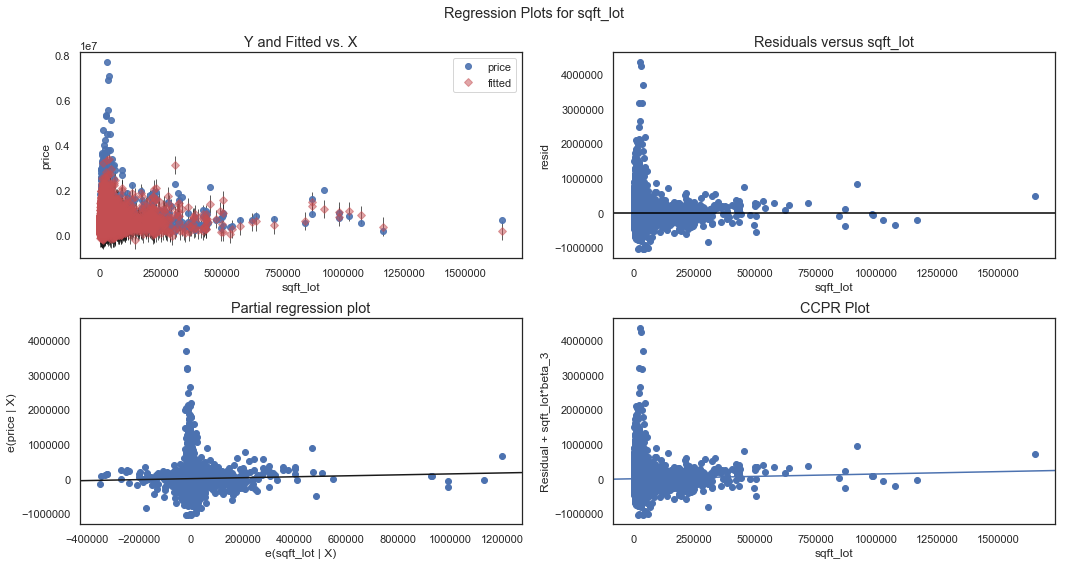

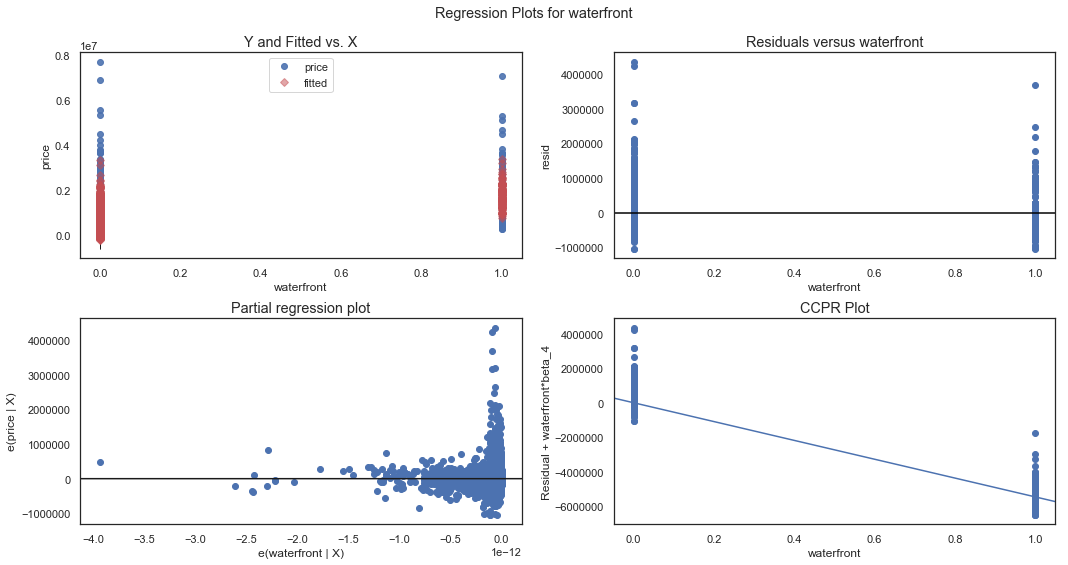

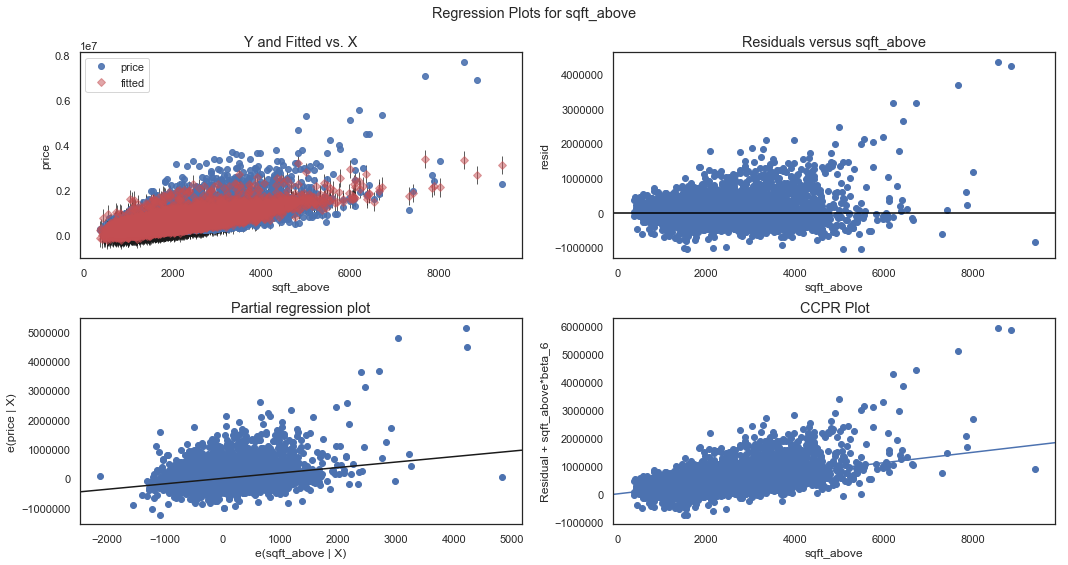

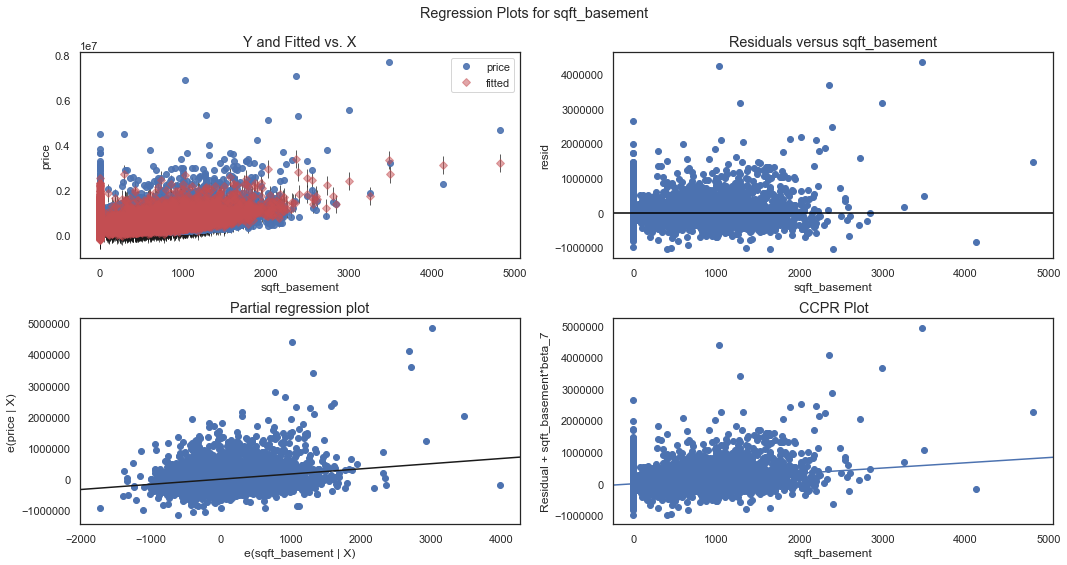

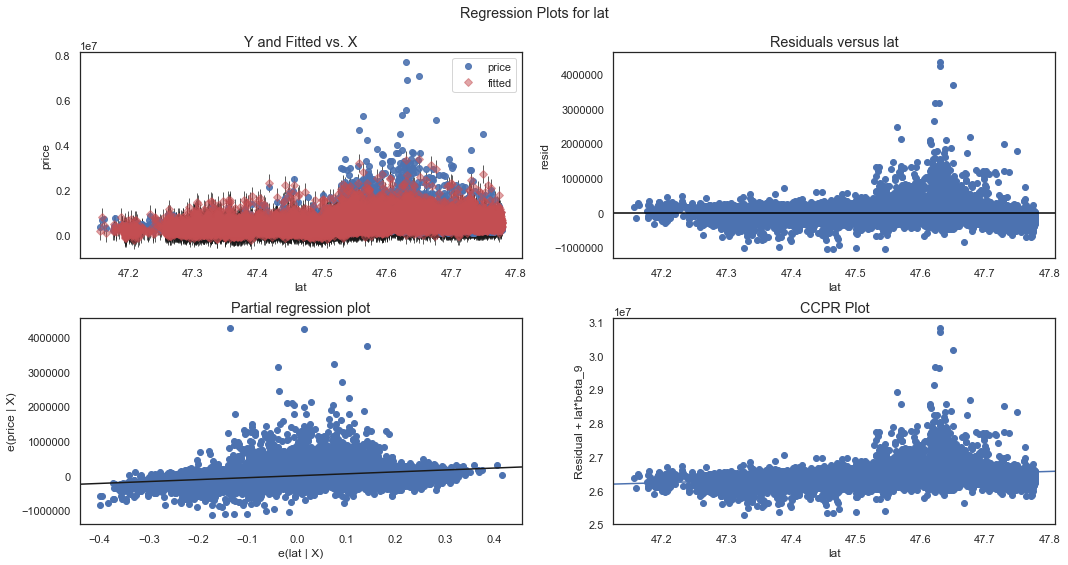

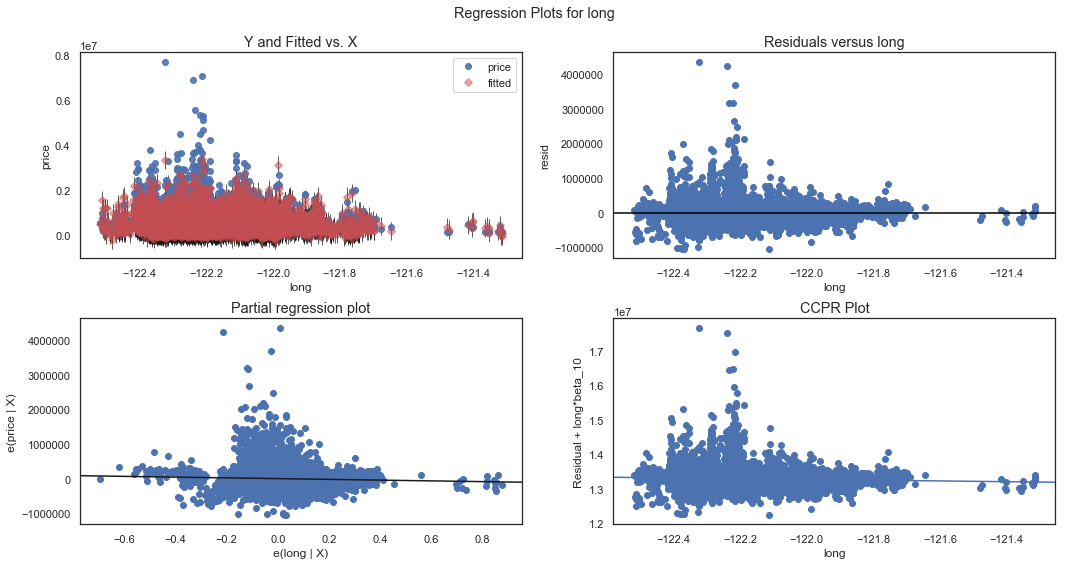

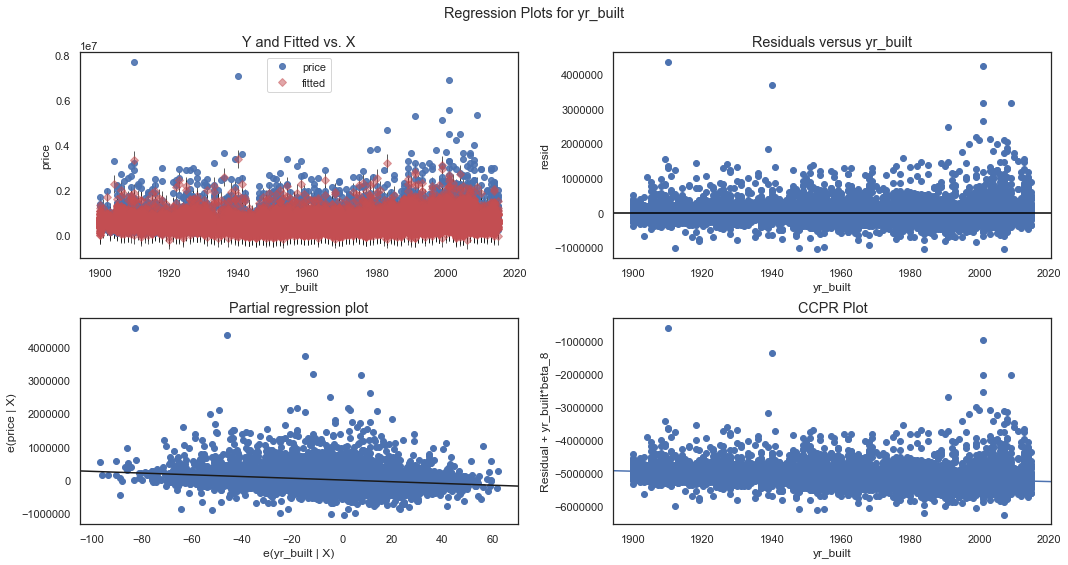

In [45]:
for col in ['bedrooms', 'bathrooms', 'sqft_lot', 'waterfront', 'sqft_above', 'sqft_basement', 'lat', 'long', 'yr_built']:
    fig = plt.figure(figsize=(15,8))
    fig = sm.graphics.plot_regress_exog(model, col, fig=fig)
    plt.show()

# Take two - log transformed (Best model)

In [46]:
df_logged = df
df_logged = df_logged.drop(data_log_names, axis=1)
df_logged = pd.concat([df_logged, data_log], axis=1)

print(data_log_names)

['bathrooms', 'bedrooms', 'lat', 'long', 'price', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot', 'sqft_lot15']


In [47]:
df_logged["long"].fillna(0, inplace=True)
df_logged = df_logged.replace([np.inf,-np.inf], np.nan)
df_logged["sqft_basement"].fillna(0, inplace=True)

In [48]:
df_logged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20967 entries, 0 to 21596
Data columns (total 30 columns):
waterfront                20967 non-null float64
grade                     20967 non-null int64
yr_built                  20967 non-null int64
floors_(-0.25, 0.25]      20967 non-null int64
floors_(0.25, 0.5]        20967 non-null int64
floors_(0.5, 0.75]        20967 non-null int64
floors_(0.75, 1.0]        20967 non-null int64
floors_(1.0, 1.25]        20967 non-null int64
condition_(-1.0, 0.5]     20967 non-null int64
condition_(0.5, 1.5]      20967 non-null int64
condition_(1.5, 2.5]      20967 non-null int64
condition_(2.5, 3.5]      20967 non-null int64
condition_(3.5, 4.5]      20967 non-null int64
condition_(4.5, 5.5]      20967 non-null int64
zipcode_(97999, 98025]    20967 non-null int64
zipcode_(98025, 98080]    20967 non-null int64
zipcode_(98080, 98140]    20967 non-null int64
zipcode_(98140, 98160]    20967 non-null int64
zipcode_(98160, 98180]    20967 non-null in

In [49]:
X = df_logged.drop(["price", "long"], axis=1)
y = df_logged["price"]
import statsmodels.api as sm
X_int = sm.add_constant(X)
model = sm.OLS(y.astype(float),X_int.astype(float)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     3579.
Date:                Tue, 25 Jun 2019   Prob (F-statistic):               0.00
Time:                        21:40:16   Log-Likelihood:                -739.25
No. Observations:               20967   AIC:                             1520.
Df Residuals:                   20946   BIC:                             1687.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   -110.9346      1.269    -87.411      0.000    -113.422    -108.447
waterfront               -36.7560      0.423    -86.926      0.000     -37.585     -35.927
grade                      0.1653      0.003     63.138      0.000       0.160       0.170
yr_built                  -0.0033   8.99e-05    -36.690      0.000      -0.003      -0.003
floors_(-0.25, 0.25]     -74.1785      0.846    -87.644      0.000     -75.837     -72.520
floors_(0.25, 0.5]     -4.032e-13   4.55e-15    -88.602      0.000   -4.12e-13   -3.94e-13
floors_(0.5, 0.75]      1.368e-12   1.55e-14     88.184      0.000    1.34e-12     1.4e-12
floors_(0.75, 1.0]       -36.7560      0.423    -86.926      0.000     -37.585     -35.927
floors_(1.0, 1.25]      9.705e-13    1.1e-14     88.129      0.000    9.49e-13    9.92e-13
condition_(-1.0, 0.5]   1.578e-12   1.79e-14     88.222      0.000    1.54e-12    1.61e-12
condition_(0.5, 1.5]     -22.3644      0.257    -86.924      0.000     -22.869     -21.860
condition_(1.5, 2.5]     -22.2782      0.254    -87.650      0.000     -22.776     -21.780
condition_(2.5, 3.5]     -22.1594      0.254    -87.162      0.000     -22.658     -21.661
condition_(3.5, 4.5]     -22.1011      0.254    -87.037      0.000     -22.599     -21.603
condition_(4.5, 5.5]     -22.0314      0.254    -86.773      0.000     -22.529     -21.534
zipcode_(97999, 98025]   -18.4456      0.211    -87.552      0.000     -18.859     -18.033
zipcode_(98025, 98080]   -18.4952      0.212    -87.352      0.000     -18.910     -18.080
zipcode_(98080, 98140]   -18.3815      0.212    -86.662      0.000     -18.797     -17.966
zipcode_(98140, 98160]   -18.5505      0.213    -87.270      0.000     -18.967     -18.134
zipcode_(98160, 98180]   -18.6038      0.212    -87.940      0.000     -19.018     -18.189
zipcode_(98180, 98205]   -18.4581      0.211    -87.482      0.000     -18.872     -18.044
bathrooms                  0.1121      0.008     14.204      0.000       0.097       0.128
bedrooms                  -0.0950      0.008    -11.568      0.000      -0.111      -0.079
lat                       61.9451      0.661     93.750      0.000      60.650      63.240
sqft_above                 0.3824      0.009     40.460      0.000       0.364       0.401
sqft_basement              0.0233      0.001     31.427      0.000       0.022       0.025
sqft_living15              0.2678      0.009     30.295      0.000       0.250       0.285
sqft_lot                   0.0236      0.005      4.727      0.000       0.014       0.033
sqft_lot15                -0.0364      0.005     -6.637      0.000      -0.047      -0.026
==============================================================================
Omnibus:                      487.299   Durbin-Watson:                   1.986
Prob(Omnibus)

C:\Users\Olivia\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


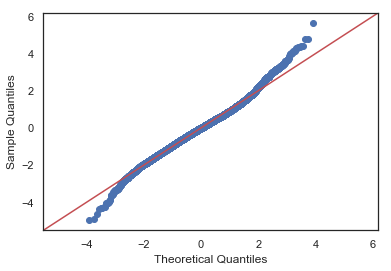

In [50]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

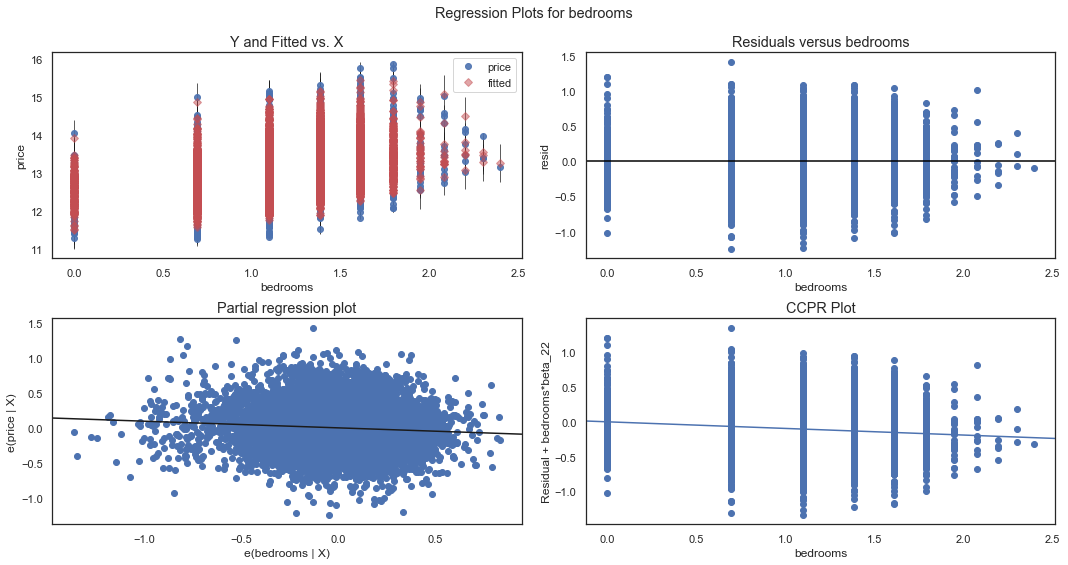

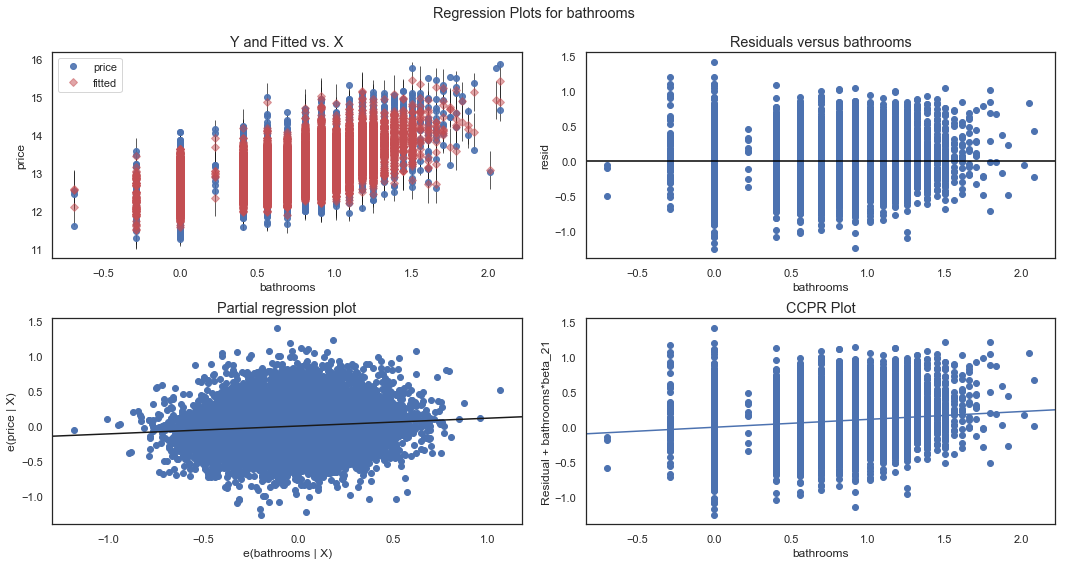

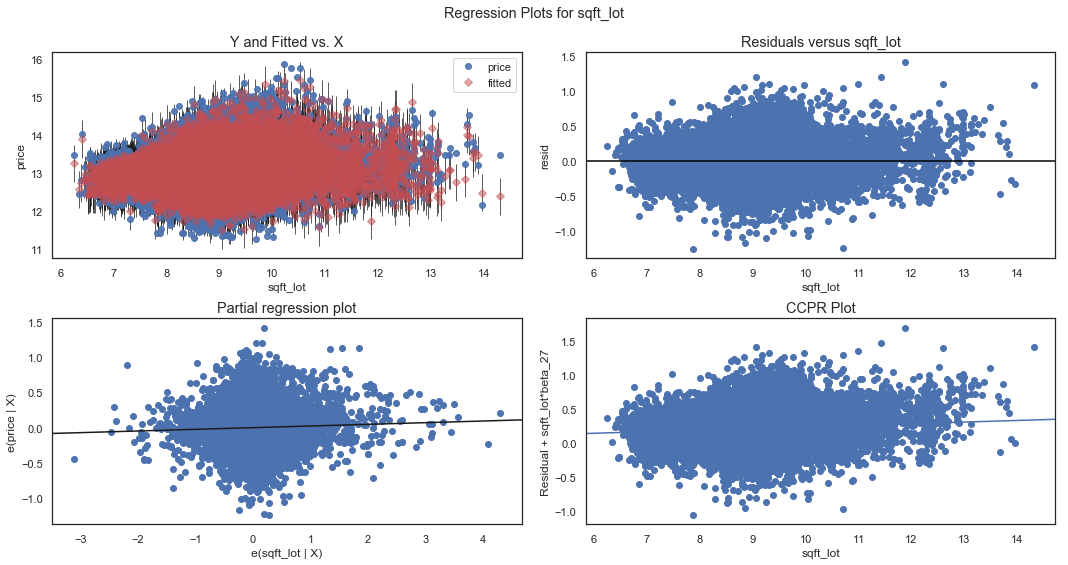

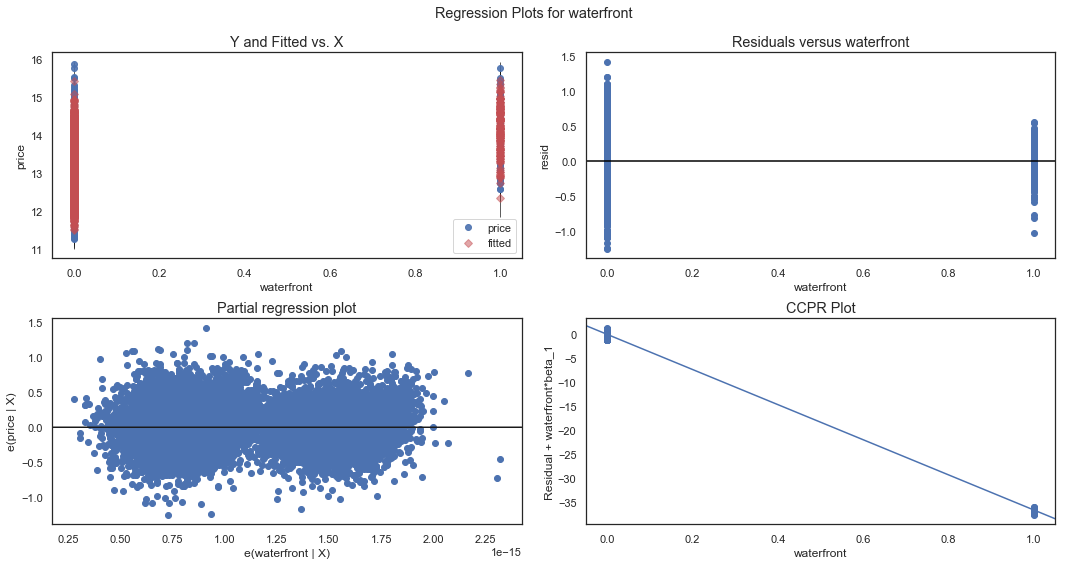

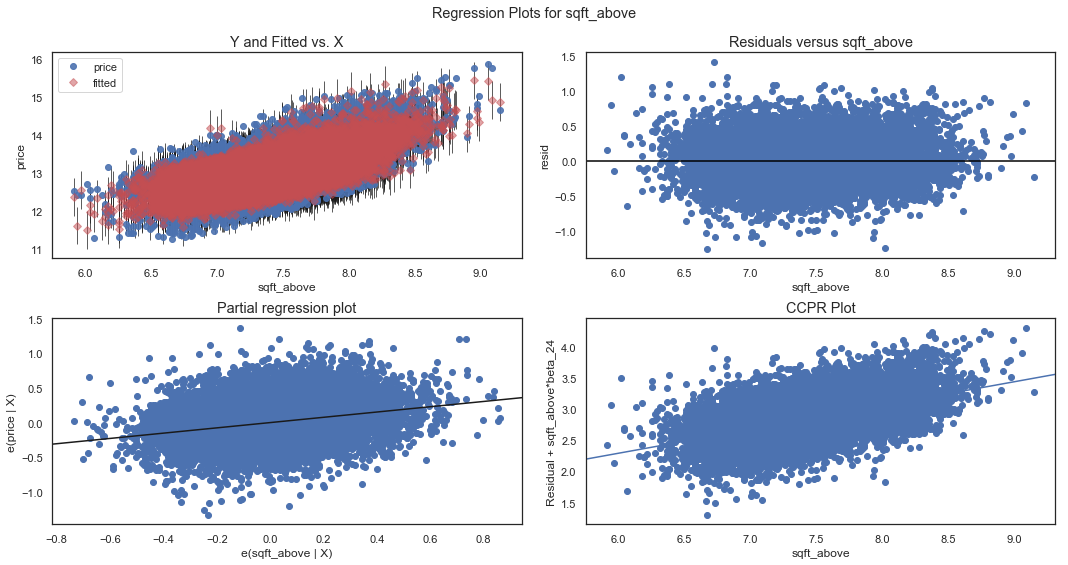

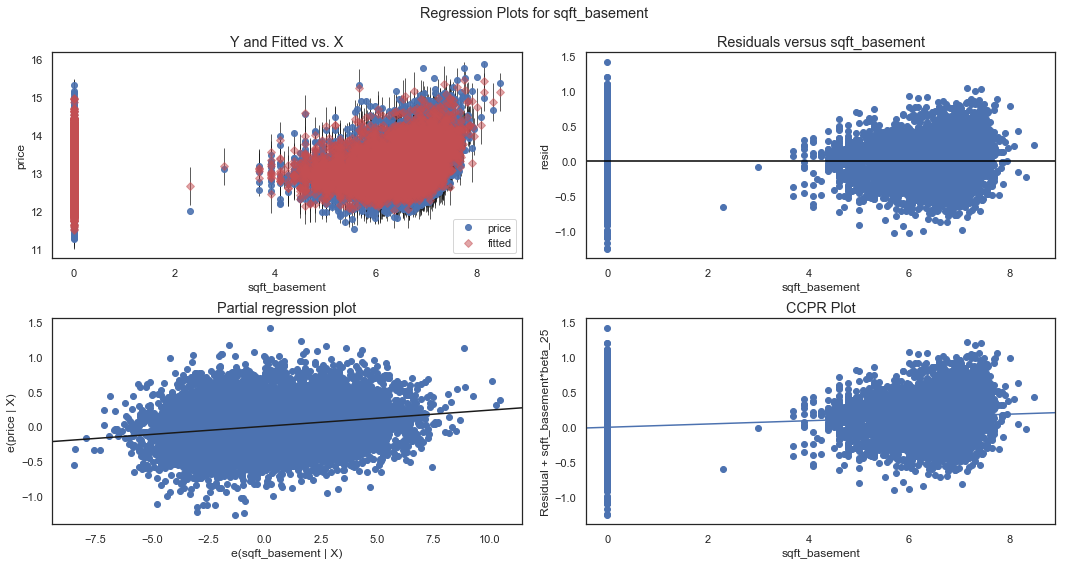

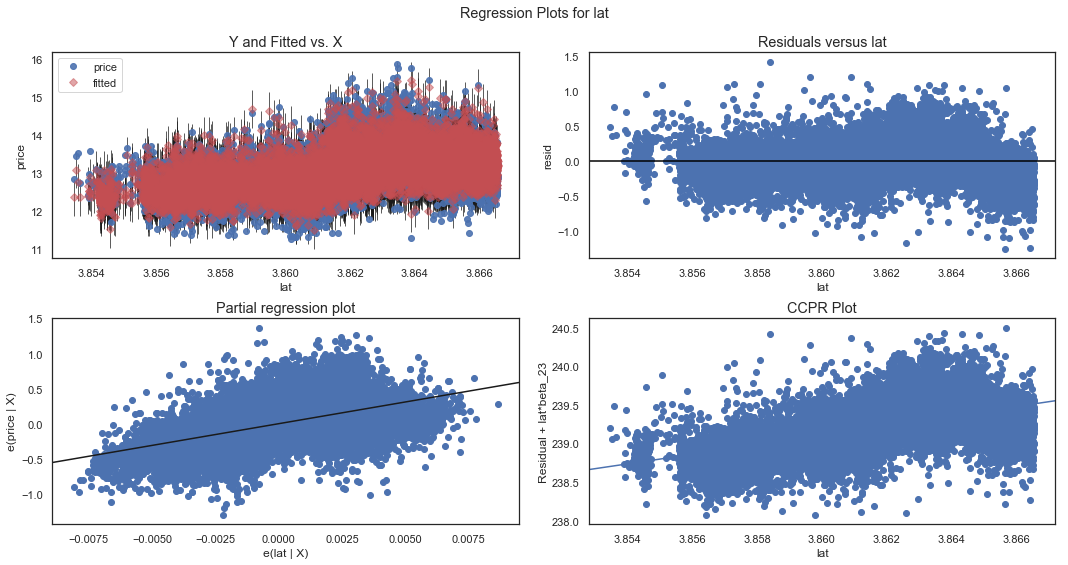

ValueError: 'long' is not in list

<Figure size 1080x576 with 0 Axes>

In [51]:
for col in ['bedrooms', 'bathrooms', 'sqft_lot', 'waterfront', 'sqft_above', 'sqft_basement', 'lat', 'long', 'yr_built']:
    fig = plt.figure(figsize=(15,8))
    fig = sm.graphics.plot_regress_exog(model, col, fig=fig)
    plt.show()

# 4. Interpretation

I have selected regression model "Take Two" as the best model to predict housing price. This model has a higher adjusted R value of 0.773. This indicates that 77.3% of the housing prices can be explained by the variables.

For waterfront: if we refer to the previous box plot, the houses with waterfront generate higher median price.
For sqf_above: 1 unit increase in size of the house apart from basement will result in 38% increase in price.
For grade: 1 unit increase will result in 16% increase in price.
For sqft_living15: 1 unit increase in interior living space in the nearest neighborhood, 26% increase in price.

Further analysis need to be done to improve model even more, such as removing more columns to further reduce multicollinearity and improve analysis for the categorical data.